# Sprint 11 - Lab 1. Víctor Guilló Seuthe

### Importar librerías

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import re
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

### Importar datos

In [2]:
# directorio de trabajo
# os.chdir('P:\\repos\\03_edix\\S11_L1_entrega')

In [3]:
# importar datos
df = pd.read_csv("../data/MDA_churn_data.csv", encoding='latin-1')
df_bk = df.copy()

### EDA

Muestra de datos y manipulación de tablas para la eliminación de campos innecesarios, y la creación de variables dicotómicas relevantes para su posterior modelado.
Limpiamos formatos de datos y valores que puedan darnos errores o crear sesgos en nuestros modelos.

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
227,2232-DMLXU,Female,0,Yes,No,1,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Mailed check,55.20,55.2,Yes
3567,1670-SVOWZ,Female,0,Yes,Yes,14,Yes,No,Fiber optic,No,...,No,Yes,No,Yes,Month-to-month,Yes,Credit card (automatic),89.65,1208.35,Yes
2233,8097-VBQTZ,Male,0,No,No,54,Yes,No,DSL,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,69.90,3883.3,No
6412,6519-ZHPXP,Female,0,Yes,Yes,72,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),108.30,7679.65,No
4510,6368-NWMCE,Female,0,No,No,38,Yes,Yes,DSL,No,...,No,Yes,No,Yes,Month-to-month,No,Credit card (automatic),68.15,2656.3,No


In [5]:
def plot_histogram_and_boxplot(df, column_name):
    """Plots the histogram and boxplot of a numerical variable. 

    Parameters:
    column_name (str): Numeric variable's name

    Returns:
    None
    """
    # Remove nulls in variable 
    df_ = df.loc[df[column_name].notnull()]
    
    fig = plt.figure()
    fig.suptitle(column_name, fontsize=16)
    fig.subplots_adjust(wspace = 0.3)
    
    ax1 = fig.add_subplot(121)
    ax1.set_title("histogram")
    ax1.hist(df_[column_name], bins = 25)
    
    ax2 = fig.add_subplot(122)
    ax2.set_title("boxplot")
    ax2.boxplot(df_[column_name], vert = False)

In [6]:
def plot_barplot(df, column_name):
    """Plots the barplot of a categorical variable. 

    Parameters:
    column_name (str): Categorical variable's name

    Returns:
    None
    """ 
    fig = plt.figure()
    fig.suptitle(column_name, fontsize=16)
    df[column_name].value_counts().plot(kind = 'bar')

In [7]:
# mostrar tipos de datos
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# comprobar falta de datos
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# contar filas con campos vacios en TotalCharges
df[df['TotalCharges'] == ' '].count()

customerID          11
gender              11
SeniorCitizen       11
Partner             11
Dependents          11
tenure              11
PhoneService        11
MultipleLines       11
InternetService     11
OnlineSecurity      11
OnlineBackup        11
DeviceProtection    11
TechSupport         11
StreamingTV         11
StreamingMovies     11
Contract            11
PaperlessBilling    11
PaymentMethod       11
MonthlyCharges      11
TotalCharges        11
Churn               11
dtype: int64

In [10]:
# eliminar filas con campos vacios en TotalCharges
df = df[df['TotalCharges'] != ' ']

In [11]:
# modificamos servicios no existentes a valor "No"
df = df.replace(to_replace=r'^No.*service$', value="No", regex=True)

# modificamos tipo de datos de TotalCharges
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [12]:
# 0 numericos, 1 boolean, 2 categoricos, otros binarios 3

features = [('gender', 3),
            ('SeniorCitizen', 3), 
            ('Partner', 1),
            ('Dependents', 1),
            ('tenure', 0),
            ('PhoneService', 1),
            ('MultipleLines', 1),
            ('InternetService', 2),
            ('OnlineSecurity', 1),
            ('OnlineBackup', 1),
            ('DeviceProtection', 1),
            ('TechSupport', 1),
            ('StreamingTV', 1), 
            ('StreamingMovies', 1),
            ('Contract', 2),
            ('PaperlessBilling', 1),
            ('PaymentMethod', 2),
            ('MonthlyCharges', 0),
            ('TotalCharges', 0),
            ('Churn', 1)
           ]

In [13]:
plt.rcParams['figure.figsize'] = [15, 5] # Se define tamaño de gráfico por cuestiones estéticas

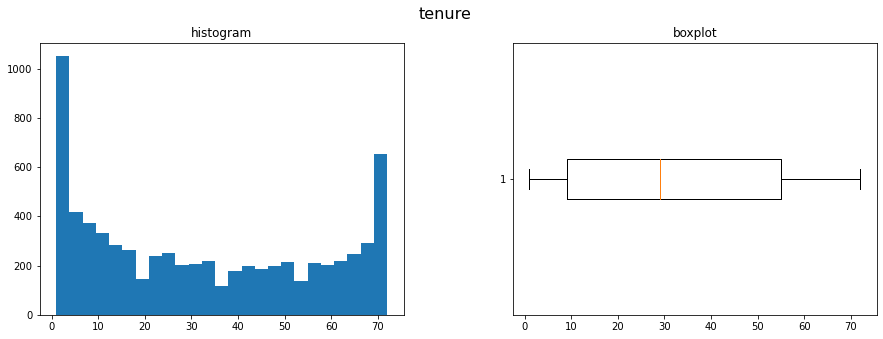

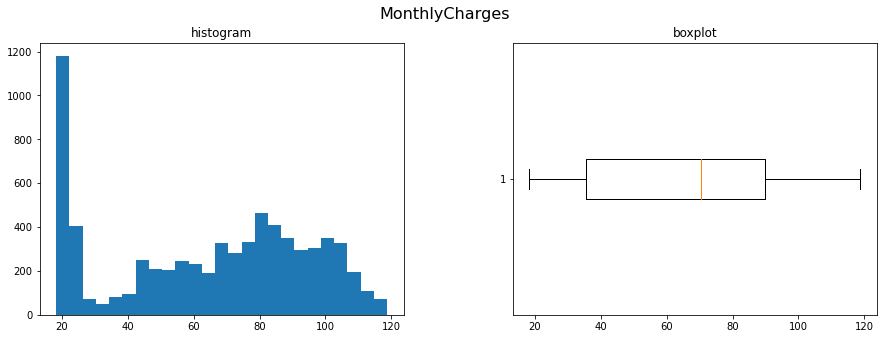

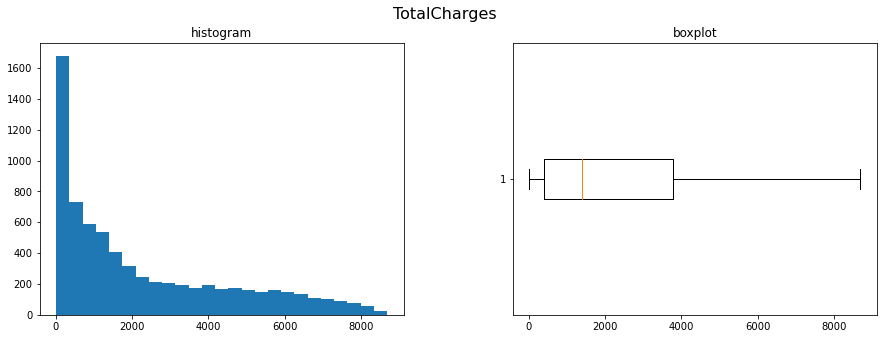

In [14]:
# variables numéricas 
numeric_cols = []
for feat in features:
    if feat[1]==0:
        numeric_cols.append(feat[0])
for c in numeric_cols:
    plot_histogram_and_boxplot(df = df, column_name = c)

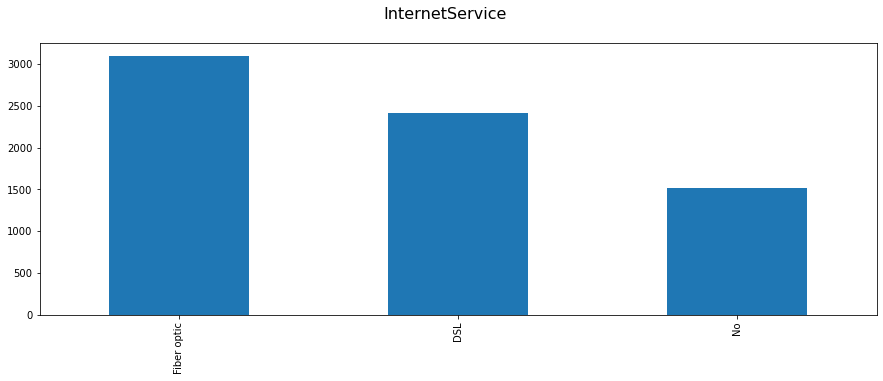

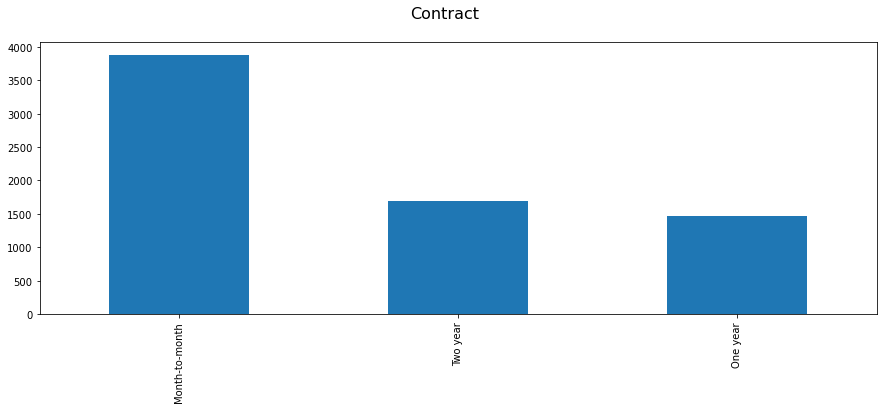

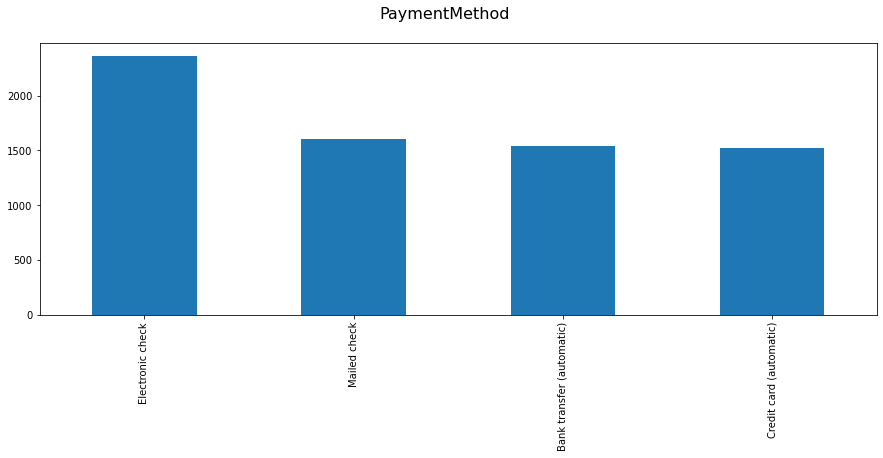

In [15]:
# Variables categóricas 
categoric_cols = []
for feat in features:
    if feat[1]==2:
        categoric_cols.append(feat[0])
# List comprehension
for c in categoric_cols:
    plot_barplot(df, column_name = c)

In [16]:
# modificamos valores Yes/No a 1/0
for feature in features:
    if feature[1] == 1:
        df[feature[0]] = df[feature[0]].map({"Yes": 1, "No": 0})

In [17]:
# almacenamos listas de categorias de servicios, pagos y contratos
InternetServices = list(df['InternetService'].unique())
for i, j in enumerate(InternetServices):
    InternetServices[i] = (j.split()[0]+"_Inet", j)

PaymentMethods =  list(df['PaymentMethod'].unique())
for i, j in enumerate(PaymentMethods):
    PaymentMethods[i] = (PaymentMethods[i].split()[0]+"Pay", j)

Contracts =  list(df['Contract'].unique())
for j in Contracts:
    df['Penalization'] = df['Contract'].map({"Month-to-month": 1, 
                                         "One year": 12,
                                        "Two year": 24})

In [18]:
# one hot encoding
for feature in InternetServices:
    df[feature[0]] = (df['InternetService']==feature[1]).astype(int)

for feature in PaymentMethods:
    df[feature[0]] = (df['PaymentMethod']==feature[1]).astype(int)

In [19]:
# descartar posibles valores no binarios en gender
df[(df['gender'] != 'Male') & (df['gender'] != 'Female')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TotalCharges,Churn,Penalization,DSL_Inet,Fiber_Inet,No_Inet,ElectronicPay,MailedPay,BankPay,CreditPay


In [20]:
# encode female / not female
df['Female'] = (df['gender']=="Female").astype(int)

In [21]:
# eliminar columnas categorizadas o innecesarias
df = df.drop(['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod'], axis = 1).reset_index(drop=True)

In [22]:
df.sample(10)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,Penalization,DSL_Inet,Fiber_Inet,No_Inet,ElectronicPay,MailedPay,BankPay,CreditPay,Female
4017,0,0,0,7,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
3908,0,1,0,59,1,0,1,0,1,0,...,0,12,0,1,0,0,0,0,1,1
6177,0,1,0,47,1,1,1,0,1,1,...,1,12,0,1,0,0,0,0,1,0
4169,0,1,1,18,1,0,0,0,0,0,...,0,12,0,0,1,0,0,1,0,0
6129,1,1,0,67,1,1,1,1,0,0,...,0,1,0,1,0,0,0,1,0,0
5843,1,1,0,21,1,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0
4591,0,1,1,52,1,0,0,0,1,0,...,0,12,1,0,0,0,0,1,0,1
5840,0,1,0,63,1,0,0,0,0,0,...,0,24,0,0,1,0,0,1,0,0
2527,1,0,0,41,1,0,0,0,1,1,...,0,12,0,1,0,0,0,1,0,1
855,0,0,0,1,1,0,0,1,0,0,...,1,1,1,0,0,1,0,0,0,0


Volvemos a comprobar tipos de datos para asegurarnos de que todos los tipos de datos están correctos

In [23]:
df.dtypes

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
PaperlessBilling      int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
Penalization          int64
DSL_Inet              int32
Fiber_Inet            int32
No_Inet               int32
ElectronicPay         int32
MailedPay             int32
BankPay               int32
CreditPay             int32
Female                int32
dtype: object

#### Gráficos de análisis

##### Correlación entre variables (features)

Comprobmos posibles correlaciones entre variables / features para eliminar o modificar variables que puedan desvirtuar nuestro modelo.

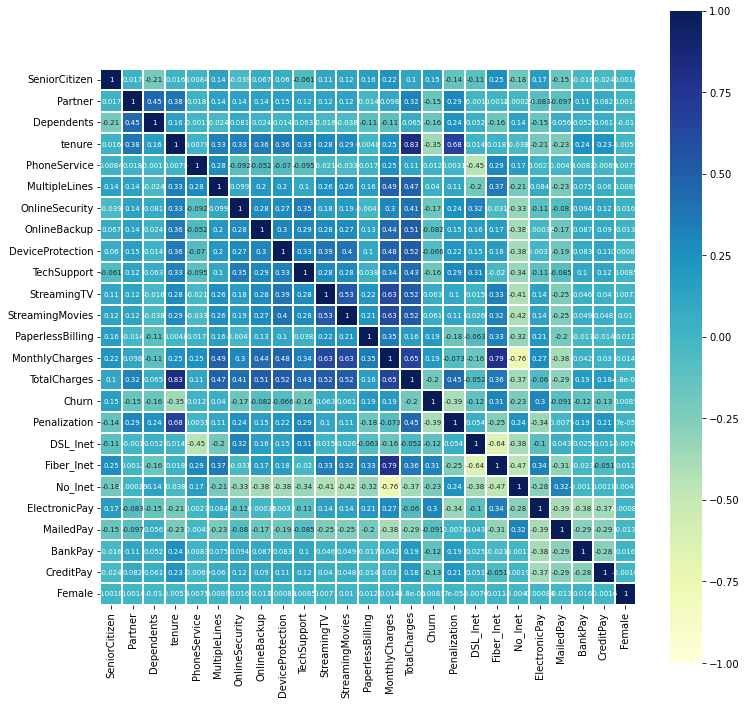

In [24]:
# formats
sns.axes_style("whitegrid")

# crear figura
fig, ax = plt.subplots(figsize=(12,12)) 

# plot heatmap
corr_data = df.corr()
sns.heatmap(corr_data,
            vmin=-1,
            vmax=1,
            square=True,
            cmap="YlGnBu",
            linewidths=0.1,
            annot=True,
            annot_kws={"fontsize":7, }
        )
plt.show()

In [25]:
# visualizacion sesgo churn rate
pd.DataFrame(df['Churn'].value_counts())

,Churn
0,5163
1,1869


## Modelos

In [26]:
# variables
X = df.drop('Churn', axis=1)   # features
y = df['Churn']                # target
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.2,     # 20% test
                                                   random_state = 7,    # seed
                                                   stratify = y)        # conservar proporciones train/test

### Clasificadores kNN

In [27]:
knn_models = {} # diccionario de resultados de modelo
for k in range(4, 25):
    knn = KNeighborsClassifier(n_neighbors=k)           # instanciar Clasi# Clasificadores kNN
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    y_pred = knn.predict(X_test)
    knn_models[k] = [knn, 
                     "kNN Model "+str(k).zfill(2), # almacenar modelo y datos relacionados a diccionario
                     train_score, 
                     test_score,
                     sklearn.metrics.confusion_matrix(y_test, y_pred)
                    ]

In [28]:
df_models = pd.DataFrame(knn_models) \
              .transpose() \
              .set_axis(['Model', 'Model_Name', 'Train', 'Test', 'ConfMatrix'], axis=1) \
              .drop(['Model', 'ConfMatrix'], axis=1) \
              .melt('Model_Name', var_name='Data', value_name='Score') \
              .sort_values(['Model_Name', 'Data']) \
              .reset_index(drop=True) 


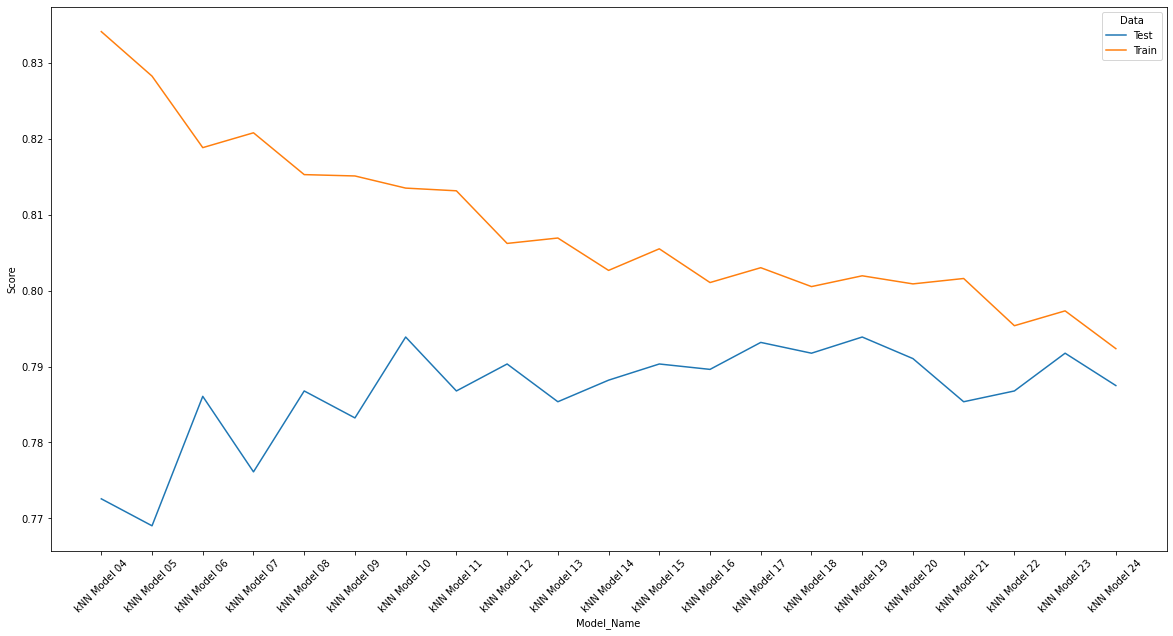

In [29]:
# crear figura
fig, ax = plt.subplots(figsize=(20,10)) 

# plot lineplot
sns.lineplot(data=df_models, 
             x='Model_Name', 
             y='Score', 
             hue='Data')
plt.xticks(rotation=45)
plt.show()

Seleccionamos kNN Model 10, 11, 17 y 19 como los más precisos

In [30]:
# add model numbers to best-of list
best_knn_models = [10, 17, 19]

### Evaluation

#### Confusion Matrix

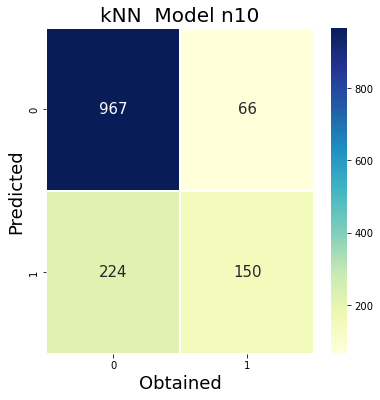

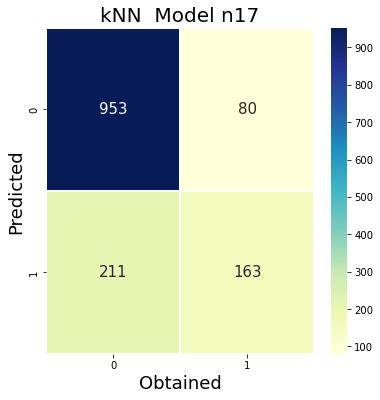

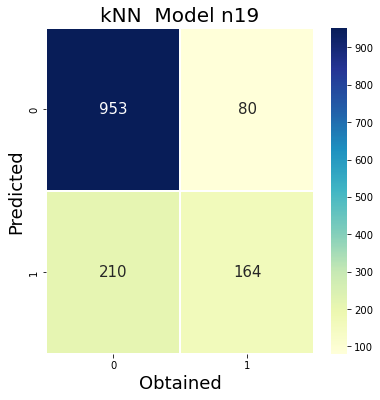

In [31]:
# iterar mejores modelos
for m in best_knn_models:
    fig, ax = plt.subplots(figsize=(6,6)) 
    sns.heatmap(knn_models[m][4], 
                cmap="YlGnBu",
                linewidths=0.1,
                annot=True,
                annot_kws={"fontsize":15, },
                fmt ='d',
                ax = ax
               )
    ax.set_title('kNN  Model n'+str(m), fontsize=20)
    ax.set_xlabel('Obtained', fontsize=18)
    ax.set_ylabel('Predicted', fontsize=18)

In [32]:
# Evaluation
y_pred_train = knn_models[19][0].predict(X_train) # Predicciones sobre train knn 19
y_pred_test = knn_models[19][0].predict(X_test) # Predicciones sobre test knn 19

d_metrics = {
    'accuracy': accuracy_score,
    'recall': recall_score,
    'precision': precision_score,
    'f1': f1_score
} # Diccionario con (clave, valor) = (nombre de métrica, métrica)

# Inicializamos output
d_output = dict()
d_output["train"] = list()
d_output["test"] = list()

# Iteramos sobre d_metrics
for metric_fun in d_metrics.values():
    d_output["train"].append(metric_fun(y_train, y_pred_train))
    d_output["test"].append(metric_fun(y_test, y_pred_test))

# Construimos dataframe
df_metrics = pd.DataFrame(d_output, index = d_metrics.keys())
df_metrics

,train,test
accuracy,0.801956,0.793888
recall,0.439465,0.438503
precision,0.704180,0.672131
f1,0.541186,0.530744


#### ROC / Precision-Recall

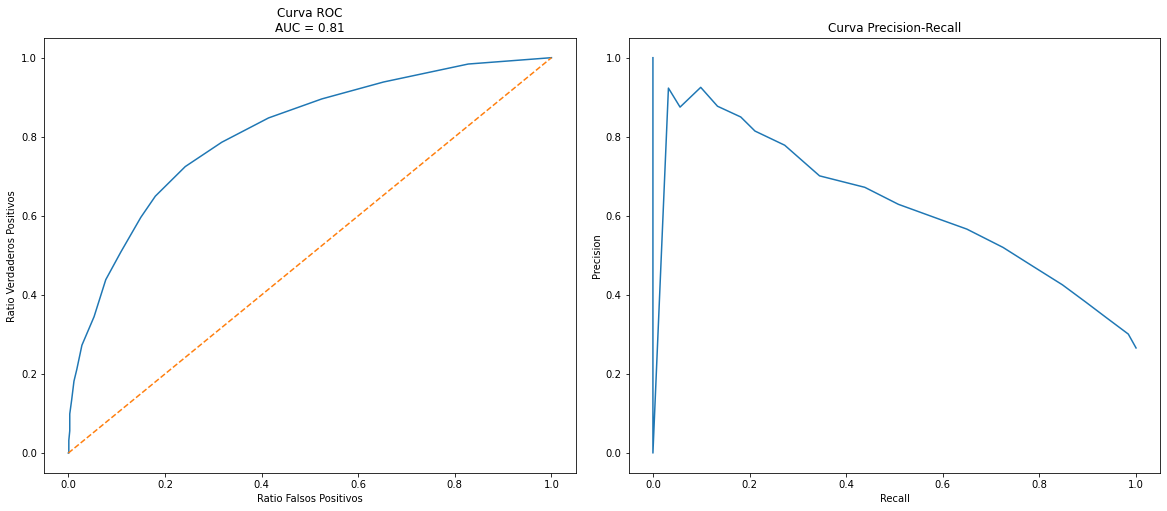

In [33]:
# predict_proba devuelve las probabilidades de las dos clases, pero sólo nos interesa la clase 1 ([:,1])
y_proba = knn_models[19][0].predict_proba(X_test)[:,1] # Modelo depth 5

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.subplots_adjust(wspace = 0.1)

fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_proba) # ROC Curve
roc_auc = sklearn.metrics.auc(fpr, tpr) # ROC AUC
ax1.plot(fpr, tpr)

ax1.set_title(f"Curva ROC\nAUC = {round(roc_auc, 3)}")
ax1.set_xlabel("Ratio Falsos Positivos")
ax1.set_ylabel("Ratio Verdaderos Positivos")


ax2.set_title("Curva Precision-Recall")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")

precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, y_proba) # Curva PR
ax2.plot(recall, precision)

ax1.plot(np.linspace(0,1,len(fpr)), np.linspace(0,1,len(fpr)), '--')
plt.show()

### Árboles de decisión

In [34]:
arboles = {}
for k in range(5, 10):
    
    # Instanciación del modelo con máxima profundidad de k
    arb = DecisionTreeClassifier(max_depth = k) 
    
    # Entrenamiento del modelo
    arb.fit(X_train, y_train)
    
    # Predicción
    y_pred = arb.predict(X_test)
    
    # Importancia de variables
    df_importances = pd.DataFrame(data = {
        'variable': X.columns, 
        'importance': arb.feature_importances_
    })
    df_importances.sort_values('importance', ascending = False, inplace = True)
    df_importances.reset_index(drop = True, inplace = True)
    
    # accuracy
    score = sklearn.metrics.accuracy_score(y_test, 
                                           y_pred).round(4)
    
    # add modelo dict
    arboles[k] = [arb,
                  df_importances,
                  score,
                  sklearn.metrics.confusion_matrix(y_test, y_pred)]

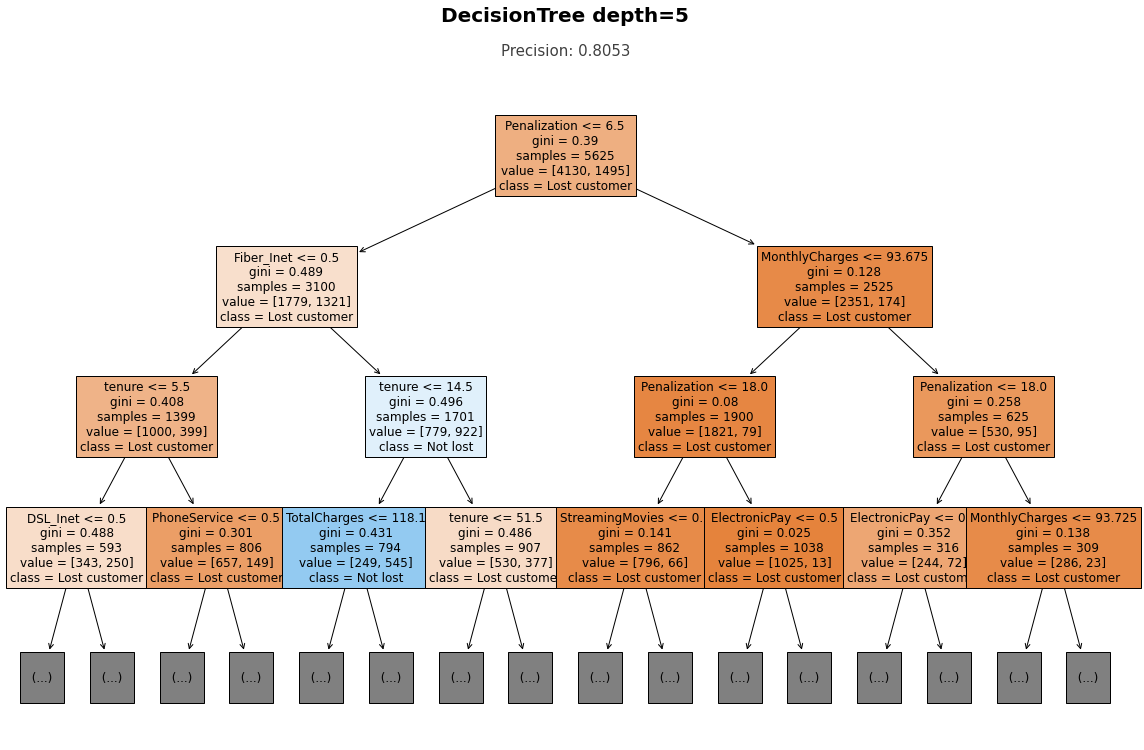

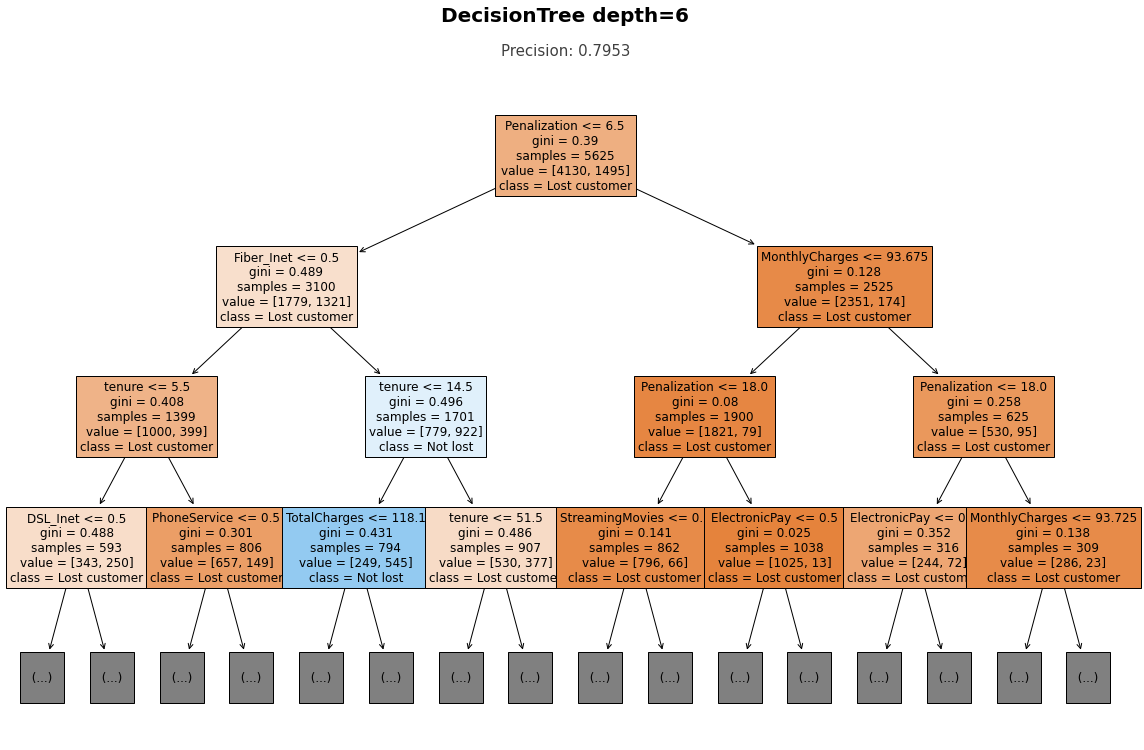

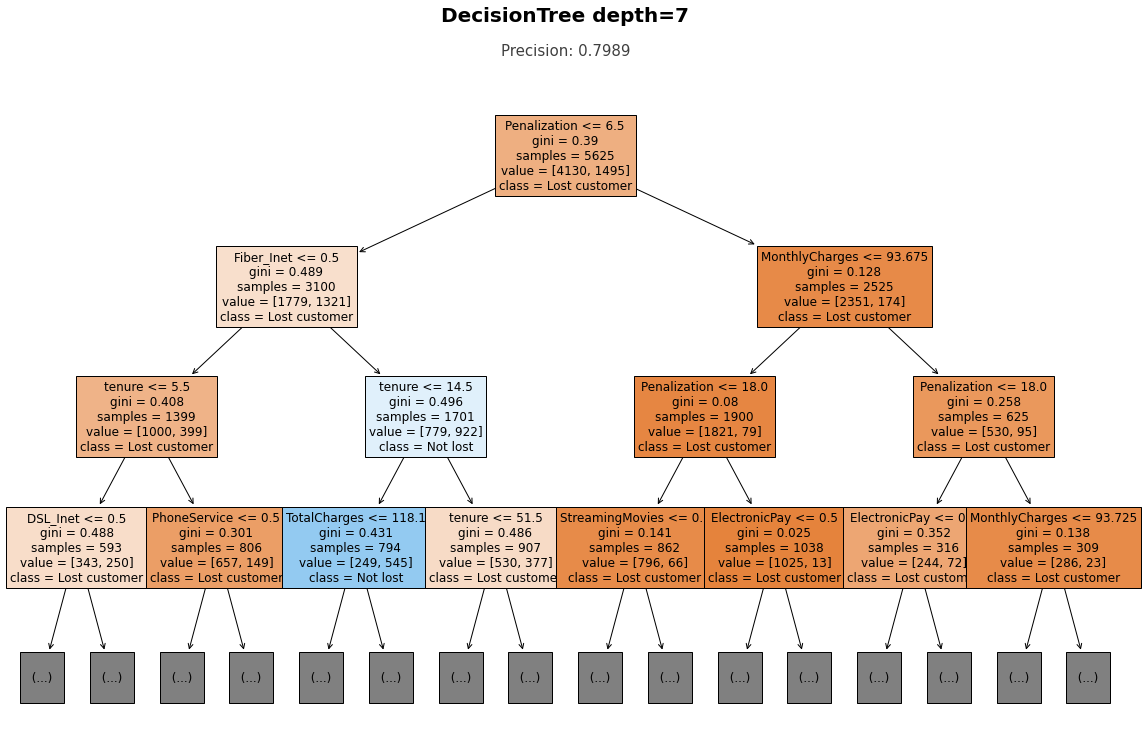

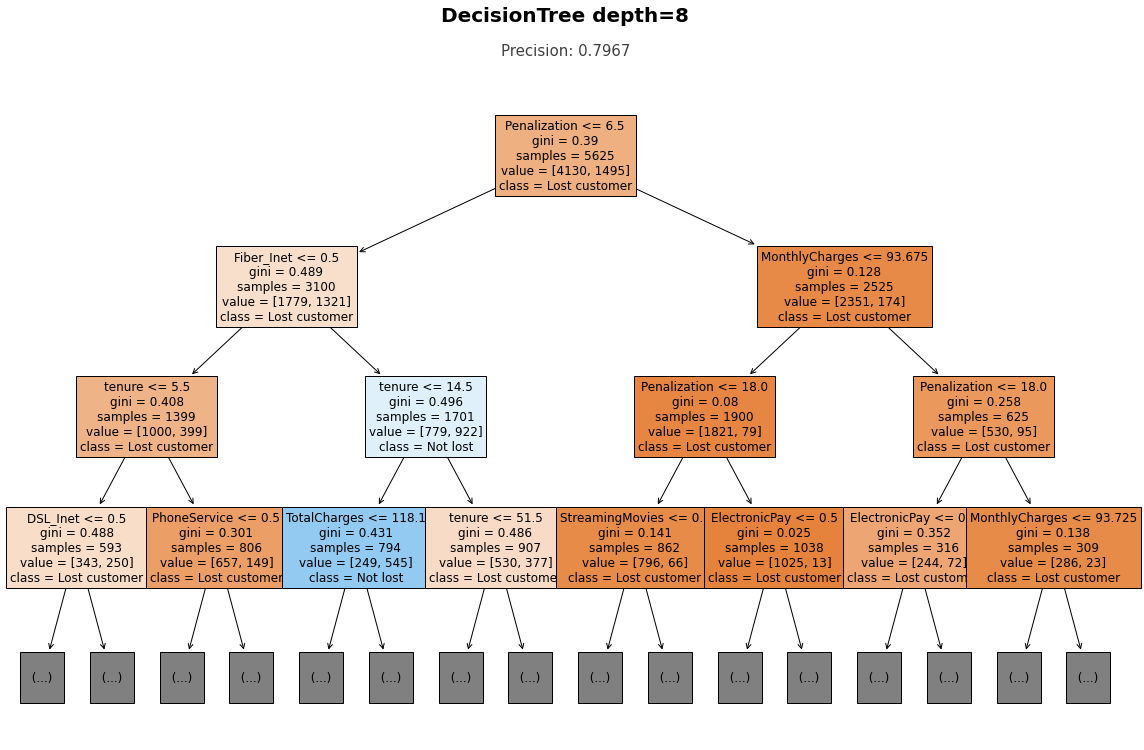

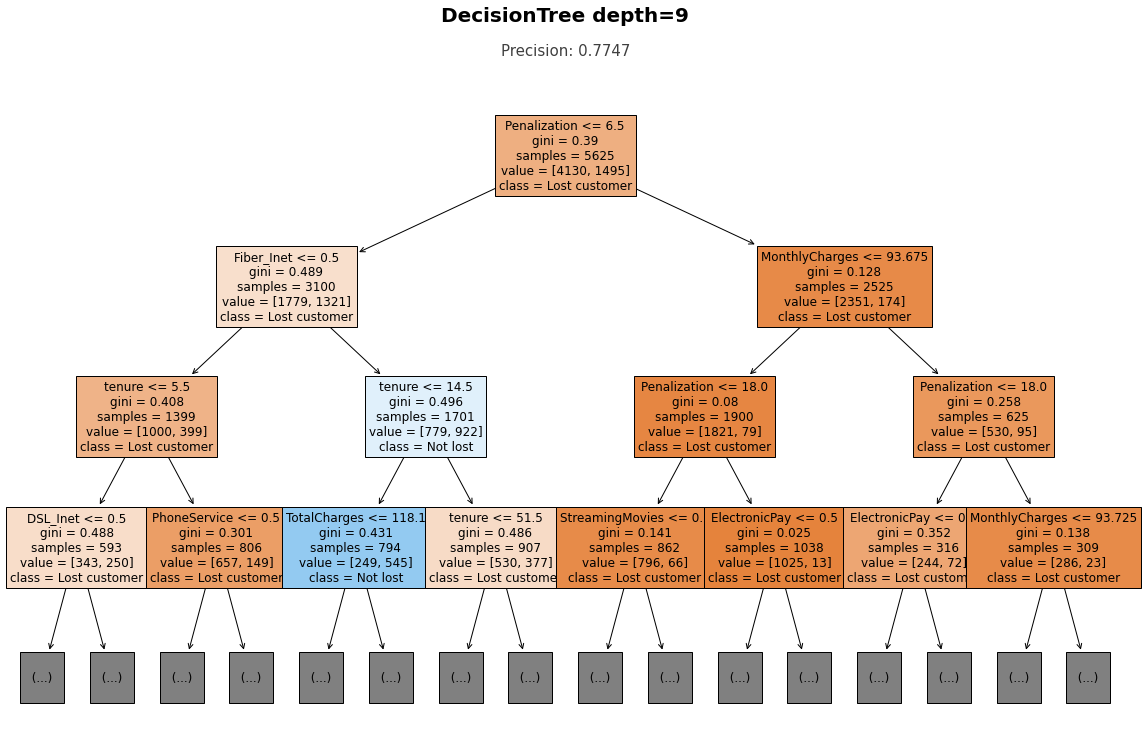

In [35]:
for a in arboles:
    # Visualización del árbol de decisión
    fig, ax = plt.subplots(figsize=(20, 12))
    plot_tree(
        arboles[a][0], 
        max_depth = 3, 
        filled = True, 
        class_names = ["Lost customer", "Not lost"],
        feature_names = X.columns,
        fontsize = 12
    )
    ax.text(x=0.5, y=1.1, 
            s=('DecisionTree depth='+str(a)), 
            fontsize=20, 
            weight='bold', 
            ha='center', 
            va='bottom', 
            transform=ax.transAxes)
    ax.text(x=0.5, y=1.05, 
            s=('Precision: '+str(arboles[a][2])), 
            fontsize=15, 
            alpha=0.75, 
            ha='center', 
            va='bottom', 
            transform=ax.transAxes)
    plt.show()

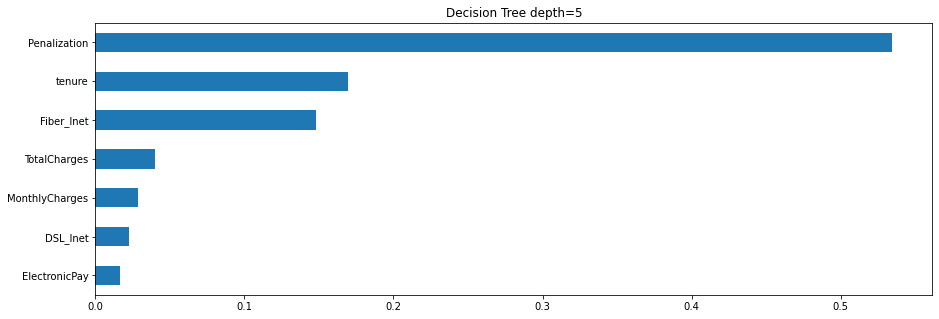

In [36]:
# Visualizamos las n_features más importantes en el DT 5
n_features = 7
arboles[5][1].iloc[:n_features][::-1].plot(title = 'Decision Tree depth=5', 
                                           x = 'variable', 
                                           y = 'importance', 
                                           kind = 'barh'
                                           ).set(ylabel = None)
plt.legend('', frameon=False)
plt.show()

### Evaluation

#### Confusion Matrix

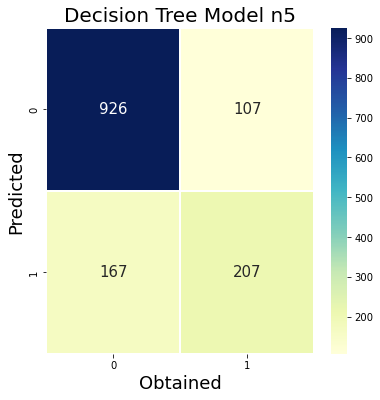

In [37]:
# Decision Tree (Depth = 5)
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(arboles[5][3], 
            cmap="YlGnBu",
            linewidths=0.1,
            annot=True,
            annot_kws={"fontsize":15, },
            fmt ='d',
            ax = ax
           )
ax.set_title('Decision Tree Model n5', fontsize=20)
ax.set_xlabel('Obtained', fontsize=18)
ax.set_ylabel('Predicted', fontsize=18)
plt.show()

In [38]:
# Evaluation
y_pred_train = arboles[5][0].predict(X_train) # Predicciones sobre train DT 5
y_pred_test = arboles[5][0].predict(X_test) # Predicciones sobre test DT 5

d_metrics = {
    'accuracy': accuracy_score,
    'recall': recall_score,
    'precision': precision_score,
    'f1': f1_score
} # Diccionario con (clave, valor) = (nombre de métrica, métrica)

# Inicializamos output
d_output = dict()
d_output["train"] = list()
d_output["test"] = list()

# Iteramos sobre d_metrics
for metric_fun in d_metrics.values():
    d_output["train"].append(metric_fun(y_train, y_pred_train))
    d_output["test"].append(metric_fun(y_test, y_pred_test))

# Construimos dataframe
df_metrics = pd.DataFrame(d_output, index = d_metrics.keys())
df_metrics

,train,test
accuracy,0.794133,0.805259
recall,0.536455,0.553476
precision,0.632991,0.659236
f1,0.580739,0.601744


#### ROC / Precision-Recall

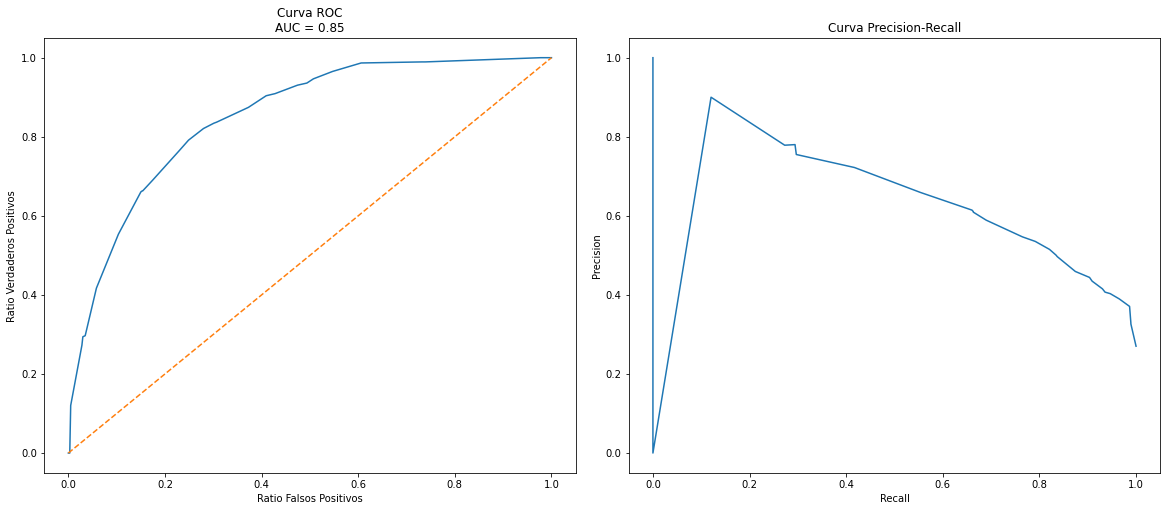

In [39]:
# predict_proba devuelve las probabilidades de las dos clases, pero sólo nos interesa la clase 1 ([:,1])
y_proba = arboles[5][0].predict_proba(X_test)[:,1] # Modelo depth 5

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.subplots_adjust(wspace = 0.1)

fpr, tpr, _ = sklearn.metrics.roc_curve(y_test, y_proba) # ROC Curve
roc_auc = sklearn.metrics.auc(fpr, tpr) # ROC AUC
ax1.plot(fpr, tpr)

ax1.set_title(f"Curva ROC\nAUC = {round(roc_auc, 3)}")
ax1.set_xlabel("Ratio Falsos Positivos")
ax1.set_ylabel("Ratio Verdaderos Positivos")


ax2.set_title("Curva Precision-Recall")
ax2.set_xlabel("Recall")
ax2.set_ylabel("Precision")

precision, recall, _ = sklearn.metrics.precision_recall_curve(y_test, y_proba) # Curva PR
ax2.plot(recall, precision)

ax1.plot(np.linspace(0,1,len(fpr)), np.linspace(0,1,len(fpr)), '--')
plt.show()